In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold

sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

# Variables a tomar en cuenta

- Study_Hours_Per_day

In [2]:
df = pd.read_csv("./dataset/student_lifestyle_dataset.csv")
df

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High
...,...,...,...,...,...,...,...,...
1995,1996,6.5,0.2,7.4,2.1,7.8,3.32,Moderate
1996,1997,6.3,2.8,8.8,1.5,4.6,2.65,Moderate
1997,1998,6.2,0.0,6.2,0.8,10.8,3.14,Moderate
1998,1999,8.1,0.7,7.6,3.5,4.1,3.04,High


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Student_ID                       2000 non-null   int64  
 1   Study_Hours_Per_Day              2000 non-null   float64
 2   Extracurricular_Hours_Per_Day    2000 non-null   float64
 3   Sleep_Hours_Per_Day              2000 non-null   float64
 4   Social_Hours_Per_Day             2000 non-null   float64
 5   Physical_Activity_Hours_Per_Day  2000 non-null   float64
 6   GPA                              2000 non-null   float64
 7   Stress_Level                     2000 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 125.1+ KB


In [4]:
df.describe()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000
mean,1000.500000,7.475800,1.990100,7.501250,2.704550,4.32830,3.115960
std,577.494589,1.423888,1.155855,1.460949,1.688514,2.51411,0.298674
min,1.000000,5.000000,0.000000,5.000000,0.000000,0.00000,2.240000
25%,500.750000,6.300000,1.000000,6.200000,1.200000,2.40000,2.900000
50%,1000.500000,7.400000,2.000000,7.500000,2.600000,4.10000,3.110000
75%,1500.250000,8.700000,3.000000,8.800000,4.100000,6.10000,3.330000
max,2000.000000,10.000000,4.000000,10.000000,6.000000,13.00000,4.000000


In [5]:
df.isna().sum()

Student_ID                         0
Study_Hours_Per_Day                0
Extracurricular_Hours_Per_Day      0
Sleep_Hours_Per_Day                0
Social_Hours_Per_Day               0
Physical_Activity_Hours_Per_Day    0
GPA                                0
Stress_Level                       0
dtype: int64

<Axes: xlabel='Stress_Level', ylabel='count'>

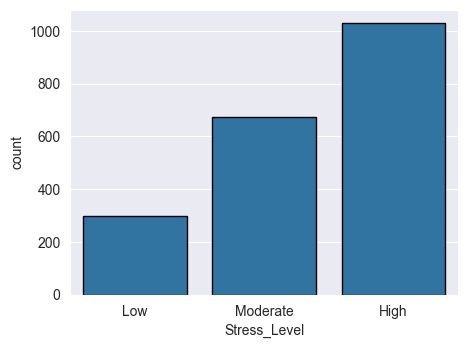

In [6]:
fig, ax = plt.subplots(figsize = (5, 3.7))

sns.countplot(data = df,
              x = 'Stress_Level',
              edgecolor = 'black',
              order = ['Low', 'Moderate', 'High'],
              ax = ax)

In [7]:
def X_y(data_input:pd.DataFrame, target:str):

    data_input = data_input.drop('Student_ID', axis = 1)
    X, y = data_input.drop(target, axis = 1), data_input[target]

    return X,y

In [8]:
target = 'Stress_Level'

X_train, y_train = X_y(df, target)
X_test, y_test = X_y(df, target)

X_train.head()

,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA
0,6.9,3.8,8.7,2.8,1.8,2.99
1,5.3,3.5,8.0,4.2,3.0,2.75
2,5.1,3.9,9.2,1.2,4.6,2.67
3,6.5,2.1,7.2,1.7,6.5,2.88
4,8.1,0.6,6.5,2.2,6.6,3.51


In [9]:
# Encode the target variable.
encode_target = {'Low':0, 'Moderate':1, 'High':2}

y_train_encode = y_train.map(encode_target)
y_test_encode = y_test.map(encode_target)

In [10]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state = 42)

sk = StratifiedKFold(n_splits = 5)

scores_train = []
scores_valid = []


for i, (idx_train, idx_valid) in enumerate(sk.split(X_train, y_train)):

    X_train_fold, X_valid_fold = X_train.iloc[idx_train], X_train.iloc[idx_valid]
    y_train_fold, y_valid_fold = y_train_encode.iloc[idx_train], y_train_encode.iloc[idx_valid]

    model.fit(X_train_fold, y_train_fold.values)

    y_pred_train = model.predict(X_train_fold)
    y_pred_valid = model.predict(X_valid_fold)

    score_train = balanced_accuracy_score(y_train_fold, y_pred_train)
    score_valid = balanced_accuracy_score(y_valid_fold, y_pred_valid)

    scores_train.append(score_train)
    scores_valid.append(score_valid)

    print(f"Fold N°{i+1}\nBalanced Acc train: {score_train:.4f}\nBalanced Acc valid: {score_valid:.4f}\n")
print(f"Balanced Accuracy train mean: {np.array(scores_train).mean():.4f}\nBalanced Accuracy valid mean: {np.array(scores_valid).mean():.4f}\n")

Fold N°1
Balanced Acc train: 1.0000
Balanced Acc valid: 1.0000

Fold N°2
Balanced Acc train: 1.0000
Balanced Acc valid: 1.0000

Fold N°3
Balanced Acc train: 1.0000
Balanced Acc valid: 1.0000

Fold N°4
Balanced Acc train: 1.0000
Balanced Acc valid: 1.0000

Fold N°5
Balanced Acc train: 1.0000
Balanced Acc valid: 1.0000

Balanced Accuracy train mean: 1.0000
Balanced Accuracy valid mean: 1.0000



In [11]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

In [12]:
model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train, y_train_encode)

y_pred_test = model.predict(X_test)

print(balanced_accuracy_score(y_test_encode, y_pred_test))

1.0


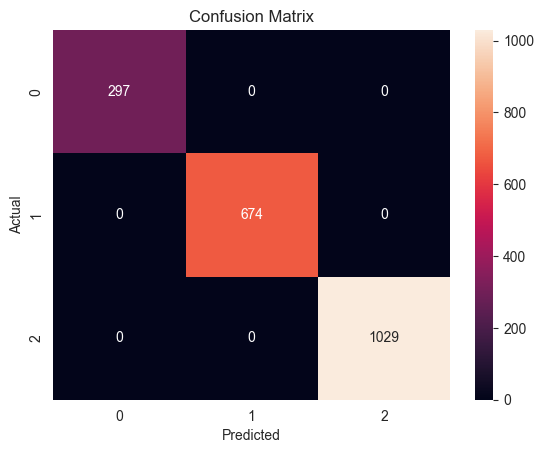

In [13]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_encode, y_pred_test)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

model_rf = RandomForestClassifier(random_state = 42)

model_rf.fit(X_train, y_train_encode)

y_pred_test = model_rf.predict(X_test)
print(classification_report(y_test_encode, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       297
           1       1.00      1.00      1.00       674
           2       1.00      1.00      1.00      1029

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



Logistic Regression - Classification Report:
              precision    recall  f1-score   support

        High       0.85      0.87      0.86      1029
         Low       0.86      0.88      0.87       297
    Moderate       0.78      0.75      0.76       674

    accuracy                           0.83      2000
   macro avg       0.83      0.83      0.83      2000
weighted avg       0.83      0.83      0.83      2000



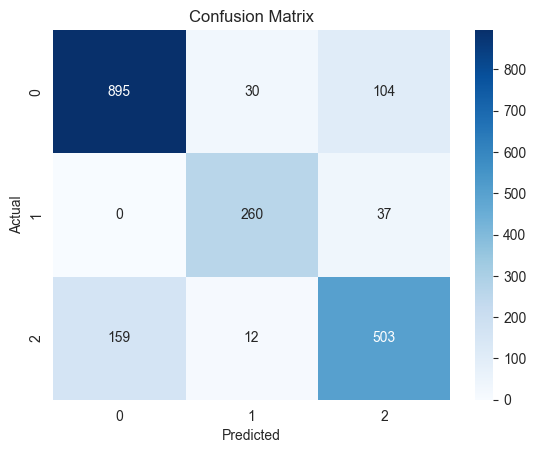

In [15]:
from sklearn.linear_model import LogisticRegression

rl_model = LogisticRegression()
rl_model.fit(X_train, y_train)
print("Logistic Regression - Classification Report:")
evaluate_model(rl_model, X_test, y_test)

KNN - Classification Report:
              precision    recall  f1-score   support

        High       0.97      0.99      0.98      1029
         Low       0.93      0.92      0.92       297
    Moderate       0.96      0.93      0.94       674

    accuracy                           0.96      2000
   macro avg       0.95      0.94      0.95      2000
weighted avg       0.96      0.96      0.96      2000



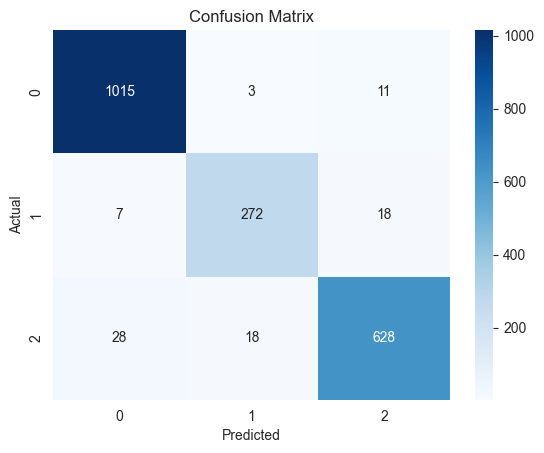

In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
print("KNN - Classification Report:")
evaluate_model(knn_model, X_test, y_test)

Naive Bay - Classification Report:
              precision    recall  f1-score   support

        High       0.89      0.85      0.87      1029
         Low       0.75      0.96      0.84       297
    Moderate       0.86      0.80      0.83       674

    accuracy                           0.85      2000
   macro avg       0.83      0.87      0.85      2000
weighted avg       0.86      0.85      0.85      2000



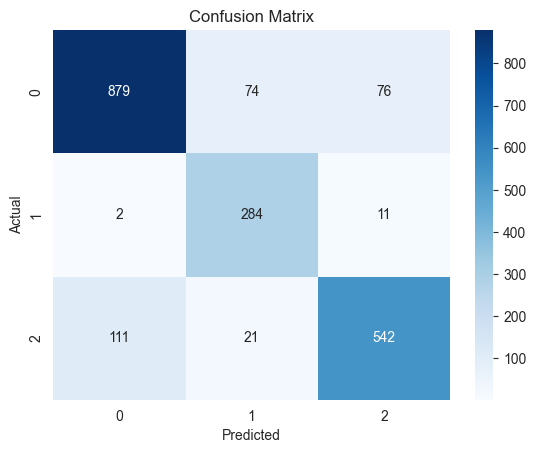

In [17]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train,y_train)
print("Naive Bay - Classification Report:")
evaluate_model(nb_model, X_test, y_test)

MLP - Classification Report:
              precision    recall  f1-score   support

        High       0.99      1.00      0.99      1029
         Low       0.99      0.94      0.97       297
    Moderate       0.98      0.99      0.98       674

    accuracy                           0.98      2000
   macro avg       0.99      0.97      0.98      2000
weighted avg       0.98      0.98      0.98      2000



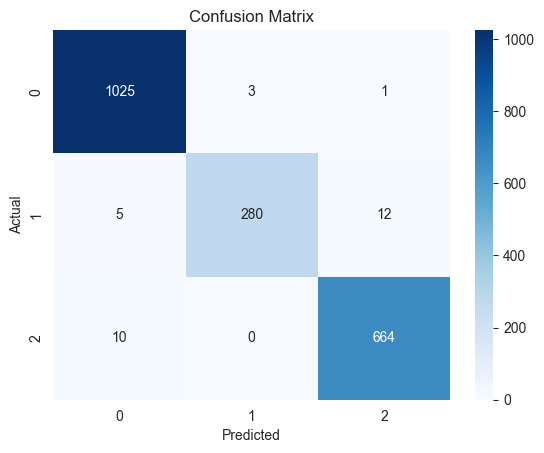

In [18]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(random_state=42)
mlp_model.fit(X_train,y_train)
print("MLP - Classification Report:")
evaluate_model(mlp_model, X_test, y_test)

In [20]:
import joblib

joblib.dump(mlp_model, '../model/stress_model.joblib')

['../model/stress_model.joblib']